In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [10]:
def savefig(origfname):
    base,ext=os.path.splitext(origfname)
    import matplotlib.pyplot as plt
    
    print_fnames=[f'Manuscript/resources/{base}.png',f'Manuscript/resources/{base}.svg']
    if ext:
        if ext!='.png' and ext!='.svg':
            print_fnames+=[f'Manuscript/resources/{origfname}']
    
    for fname in print_fnames:
        print(fname)
        plt.savefig(fname, bbox_inches='tight')

In [4]:
base='sims/2023-06-02'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

## Just do the noise with no jitter

In [5]:
rf_size=19
eta=1e-6
number_of_neurons=25
number_of_processes=4
mu_c_mat=[0,7.5,0,7.5]
sigma_c_mat=[0,2,2,0]
blur=4
noise_mat=linspace(0,1,21)
noise_mat

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [6]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
noise_count=0

for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise

        all_params.append(params(count=count,
                     eta=eta,
                     noise=open_eye_noise,
                     blur=blur,
                     number_of_neurons=number_of_neurons,
             sfname=f'{base}/fix {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {noise:.2f} noise.asdf',
                            mu_c=mu_c,sigma_c=sigma_c))

        count+=1
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.0, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.00 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.05, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.05 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.1, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.10 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.15000000000000002, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.15 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.2, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.20 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=79, eta=1e-06, noise=0.8, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 7.5 mu_c 0 sigma_c 4 blur 0.

In [7]:
blur

4

## Premake the image files

In [8]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)

normal_image=pi5.filtered_images(
                                base_image_file,
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )

Lfname=pi5.filtered_images(
                            base_image_file,
                            {'type':'blur','size':blur},
                            {'type':'dog','sd1':1,'sd2':3},
                            {'type':'norm'},
                            )




Base Image File: asdf/bbsk081604_all_scale2.asdf
Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_b0fdf9b6c831fb574442b0a3cfb98dd9.asdf from cache.

## Functions for Fix

In [8]:
def run_one_continuous_fix_jitter(params,
                                  overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,noise,blur,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,params.blur,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf'
    
    seq=pn.Sequence()
    
    seq+=fix_jitter(total_time=8*day,
             save_interval=20*minute,number_of_neurons=params.number_of_neurons,
            mu_c=mu_c,sigma_c=sigma_c,
             eta=eta,noise=noise)
    seq_load(seq,deficit_base_sim)    

    if run:
        seq.run(display_hash=False)
        pn.save(sfname,seq) 
    
    return sfname



In [9]:
func=run_one_continuous_fix_jitter

In [10]:
do_params=make_do_params(all_params)
len(do_params)

0

In [12]:
%%time
print(func.__name__)
func(all_params[0],overwrite=True)

run_one_continuous_fix_jitter
[.] Sequence Time Elapsed...2 m, 29.04 s
CPU times: user 6min 9s, sys: 2min 13s, total: 8min 22s
Wall time: 2min 38s


'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.00 noise.asdf'

In [13]:
real_time=2*60+ 38

In [14]:
if len(do_params)>13:
    for a in do_params[:5]:
        print(a)
    print("[....]")
    for a in do_params[-5:]:
        print(a)
else:
    for a in do_params:
        print(a)
    

print(len(do_params))

print(time2str(real_time*len(do_params)/number_of_processes))


params(count=0, eta=1e-06, noise=0.0, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.00 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.05, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.05 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.1, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.10 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.15000000000000002, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.15 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.2, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.20 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=79, eta=1e-06, noise=0.8, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/fix 25 neurons 7.5 mu_c 0 sigma_c 4 blur 0.

In [15]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

[[[[.] Sequence Time Elapsed...3 m, 2.10 s
.] Sequence Time Elapsed...3 m, 2.91 s
..] ] Sequence Time Elapsed...3 m, 3.62 sSequence Time Elapsed...3 m, 3.60 s

[[[[.] Sequence Time Elapsed...3 m, 56.86 s
.] Sequence Time Elapsed...3 m, 57.63 s
.] Sequence Time Elapsed...3 m, 58.37 s
.] Sequence Time Elapsed...3 m, 57.05 s
[[[[.] Sequence Time Elapsed...3 m, 38.72 s
.] Sequence Time Elapsed...3 m, 38.86 s
.] Sequence Time Elapsed...3 m, 39.06 s
.] Sequence Time Elapsed...3 m, 39.19 s
[[[[.] Sequence Time Elapsed...3 m, 59.39 s
.] Sequence Time Elapsed...4 m, 0.50 s
.] Sequence Time Elapsed...3 m, 59.95 s
.] Sequence Time Elapsed...4 m, 0.19 s
[[[[.] .Sequence Time Elapsed...3 m, 44.08 s] 
Sequence Time Elapsed...3 m, 44.41 s
.] Sequence Time Elapsed...3 m, 43.02 s
.] Sequence Time Elapsed...3 m, 44.15 s
[[[[.] Sequence Time Elapsed...4 m, 0.97 s
.] Sequence Time Elapsed...4 m, 1.22 s
.] Sequence Time Elapsed...4 m, 1.50 s
.] Sequence Time Elapsed...4 m, 1.64 s
[[[[.] Sequence Time Elaps

['sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.00 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.05 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.10 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.15 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.20 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.25 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.30 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.35 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.40 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.45 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.50 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.55 noise.asdf',
 'sims/2023-06-02/fix 25 neurons 0 mu_c 0 sigma_c 4 blur 0.60 noise.asdf',
 'sims/2023-06-02/fix 25 

## View the sims

In [12]:
sfname=all_params[0].sfname
R=Results(sfname)

In [15]:
t=R.t/day
recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

In [16]:
recovery_rate_μ

-0.021798706037154038

/Users/bblais/tmp/ipykernel_47307/1582112873.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcolormesh(w_im[n,c,...],cmap=py.cm.gray,


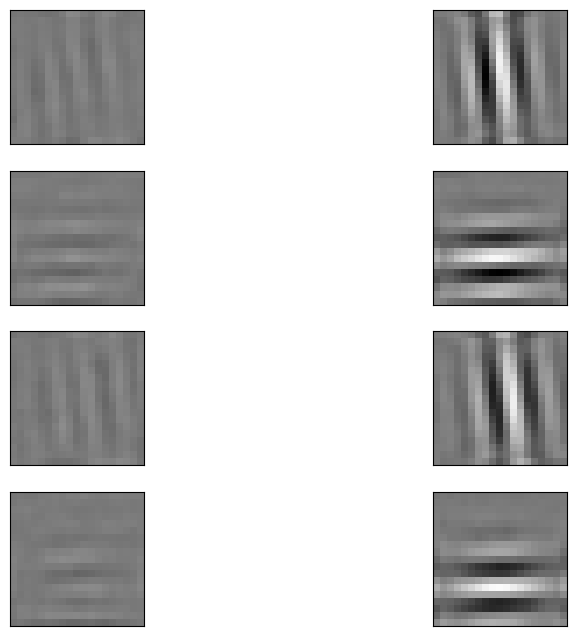

In [17]:
t,y,θ,W=R[-1]
vmin=W.min()
vmax=W.max()

w_im=R.weight_image(W)
count=1
for n in range(4):
    for c in range(2):
        subplot(4,2,count)
        pcolormesh(w_im[n,c,...],cmap=py.cm.gray,
                        vmin=vmin,vmax=vmax)
        ax2=gca()
        ax2.set_aspect('equal')
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])
        ax2.xaxis.set_ticks_position('none') 
        ax2.yaxis.set_ticks_position('none') 
        
        count+=1


In [7]:
RR={}
count=0
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/84 [00:00<?, ?it/s]

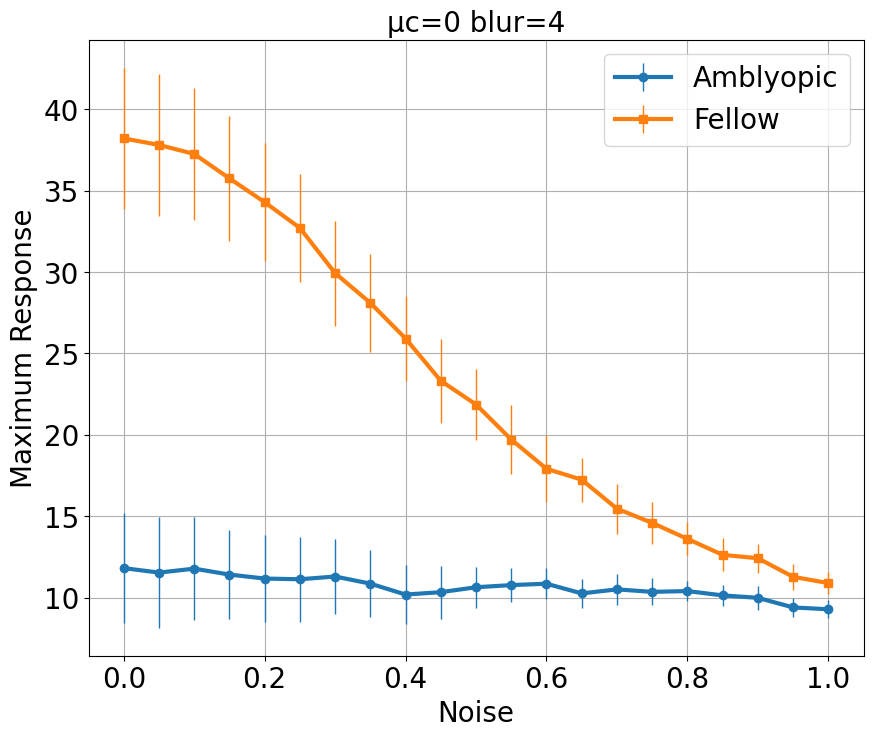

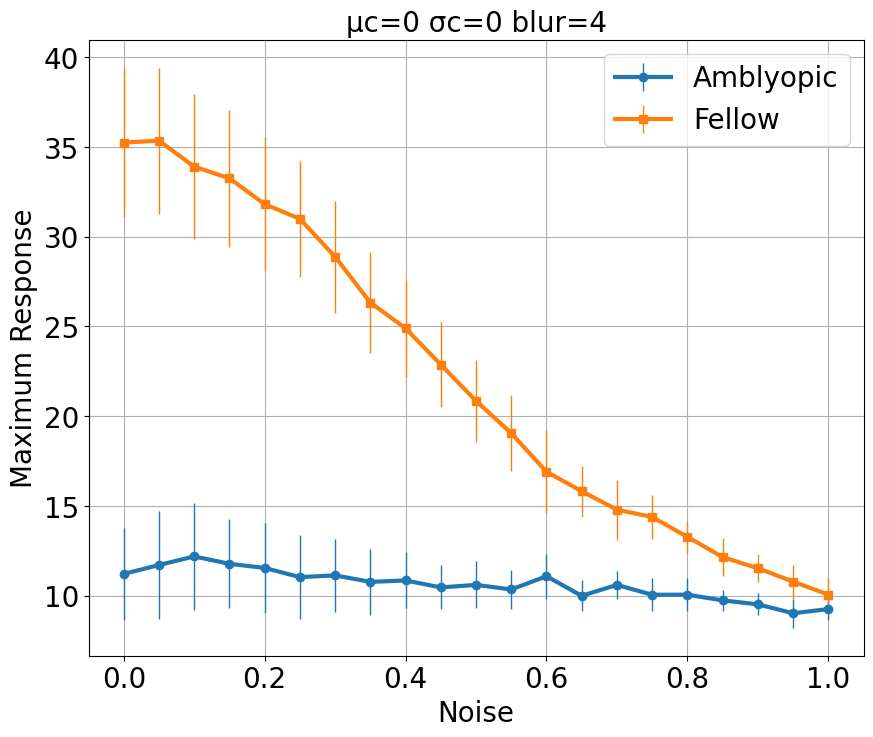

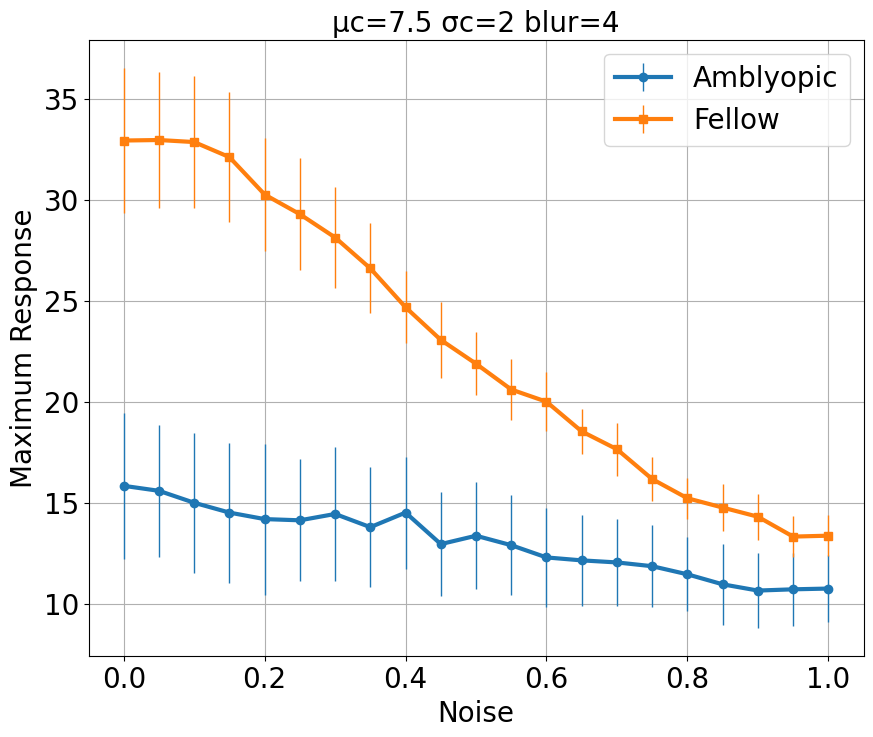

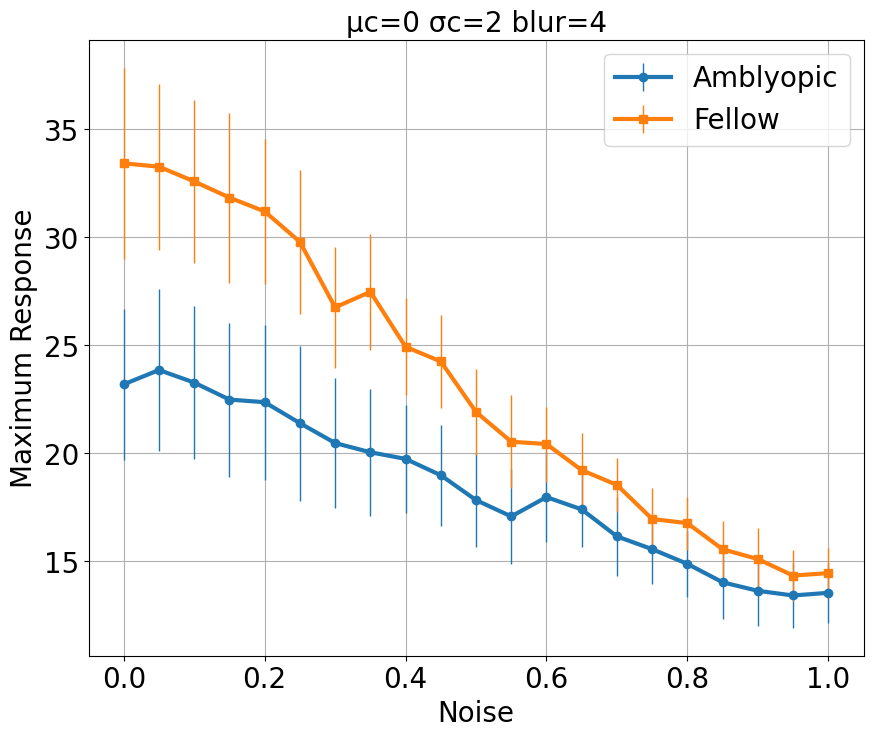

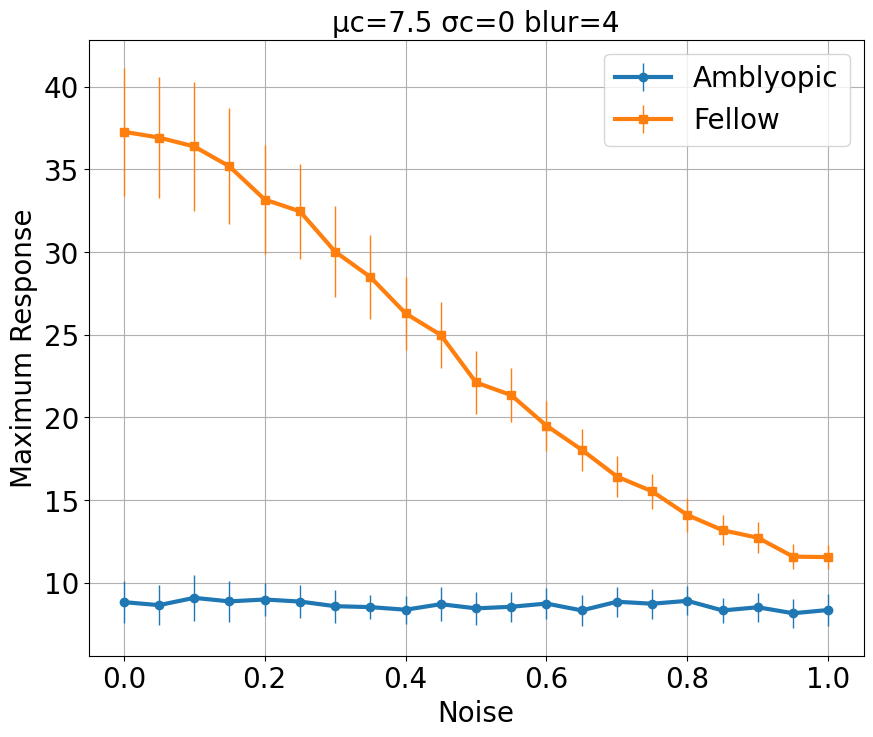

In [19]:
count=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=noise,μ1,μ2,σ1,σ2


    noise,μ1,μ2,σ1,σ2=s.arrays()

    figure()
    errorbar(noise,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='Amblyopic')
    errorbar(noise,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='Fellow')
    xlabel('Noise')
    ylabel('Maximum Response')
    title(f'μc={mu_c} σc={sigma_c} blur={blur}')
    legend()    

(-0.2, 1.105)

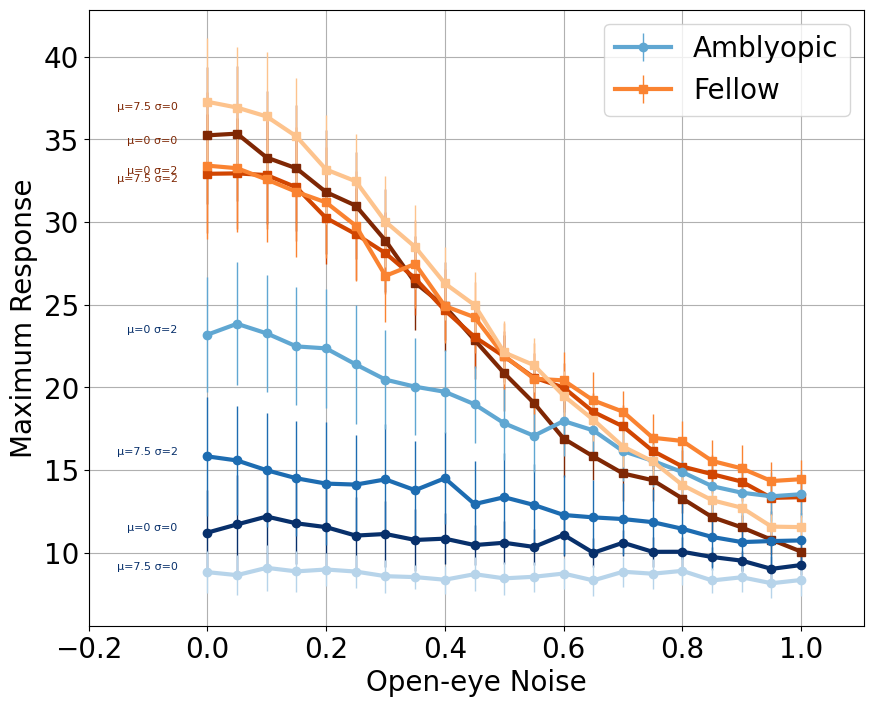

In [14]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=noise,μ1,μ2,σ1,σ2


    noise,μ1,μ2,σ1,σ2=s.arrays()

    if idx==2:
        errorbar(noise,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
        errorbar(noise,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    else:
        errorbar(noise,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='_',color=cm.Blues(v[idx]))
        errorbar(noise,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='_',color=cm.Oranges(v[idx]))
        
        
    dy=0.3
    text(-.05,μ1[:1]+dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Blues(v[0]))         
    text(-.05,μ2[:1]-dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Oranges(v[0]))
    
    idx+=1        
    
xlabel('Open-eye Noise')
ylabel('Maximum Response')
legend()    
# gca().set_xticks(range(0,13,2))
xlim([-.2,1.105])

    

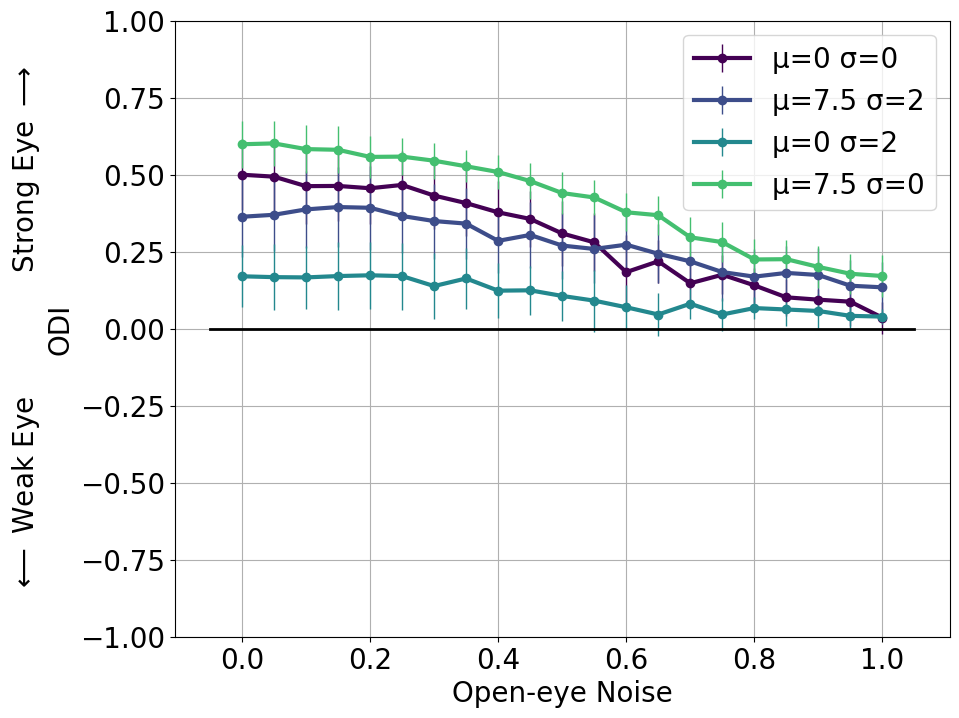

In [18]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])
        
        s+=noise,μ,σ


    noise,μ,σ=s.arrays()

    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Open-eye Noise')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")

ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

legend()    
# gca().set_xticks(range(0,13,2))

    

Manuscript/resources/fig-fix-response-ODI-blur.png.png
Manuscript/resources/fig-fix-response-ODI-blur.png.svg


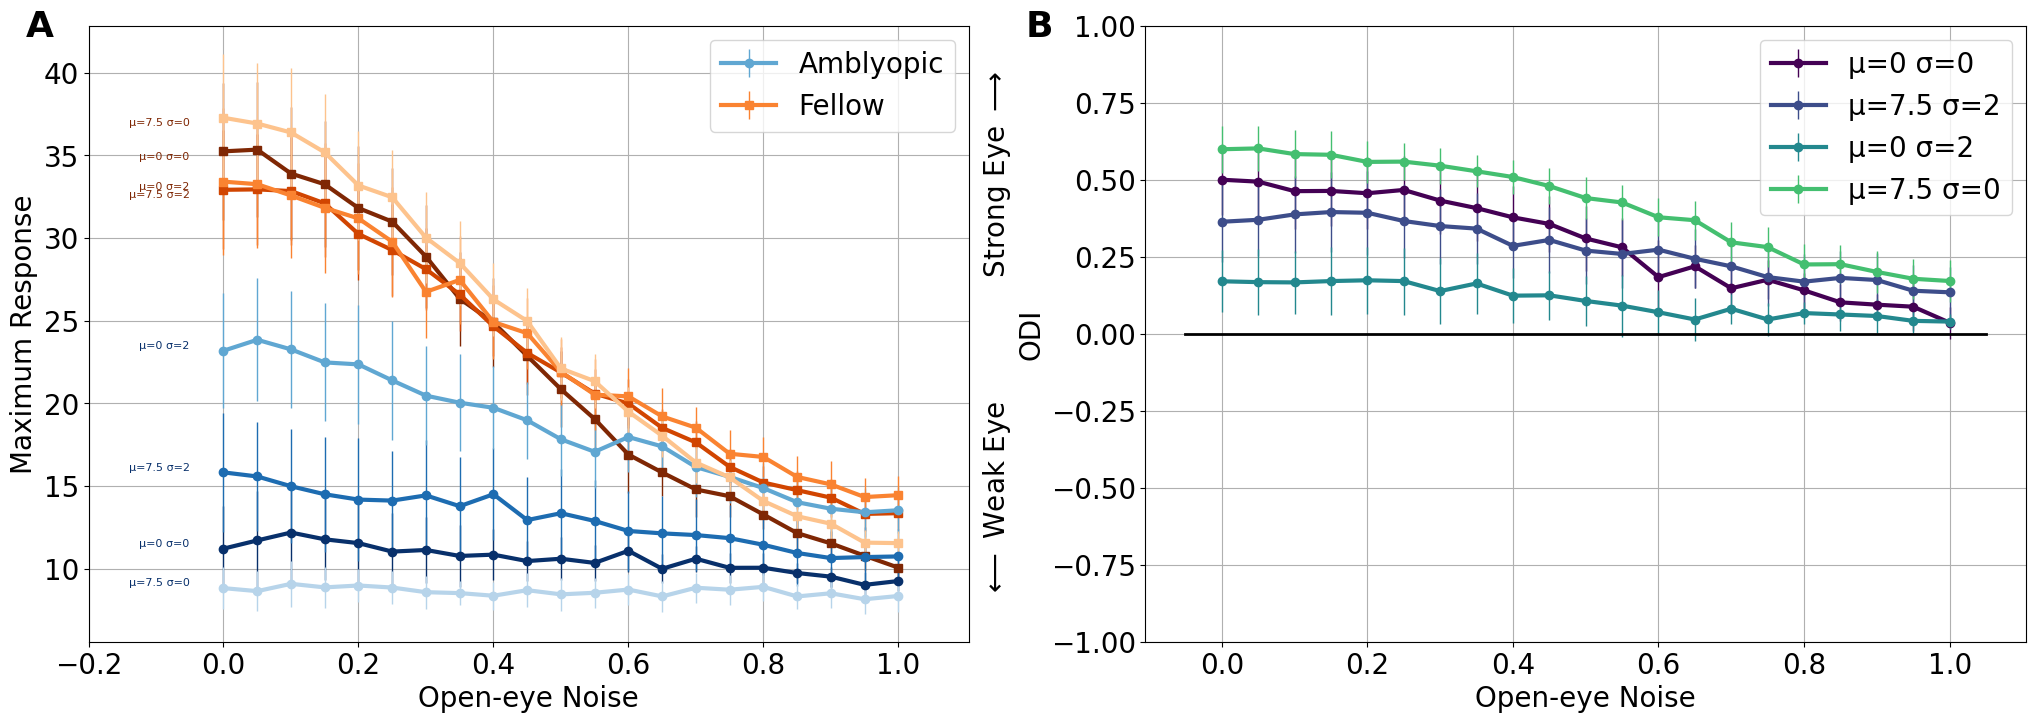

In [8]:
figure(figsize=(25,8))
subplot(1,2,1)


v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=noise,μ1,μ2,σ1,σ2


    noise,μ1,μ2,σ1,σ2=s.arrays()

    if idx==2:
        errorbar(noise,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
        errorbar(noise,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    else:
        errorbar(noise,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='_',color=cm.Blues(v[idx]))
        errorbar(noise,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='_',color=cm.Oranges(v[idx]))
        
        
    dy=0.3
    text(-.05,μ1[:1]+dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Blues(v[0]))         
    text(-.05,μ2[:1]-dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Oranges(v[0]))
    
    idx+=1        
    
xlabel('Open-eye Noise')
ylabel('Maximum Response')
legend()    
# gca().set_xticks(range(0,13,2))
xlim([-.2,1.105])

    
    
subplot(1,2,2)
    
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])
        
        s+=noise,μ,σ


    noise,μ,σ=s.arrays()

    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Open-eye Noise')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")

ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

legend()    
# gca().set_xticks(range(0,13,2))

      

plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-fix-response-ODI-blur.png')    
    

Manuscript/resources/fig-fix-response-ODI-blur.png
Manuscript/resources/fig-fix-response-ODI-blur.svg


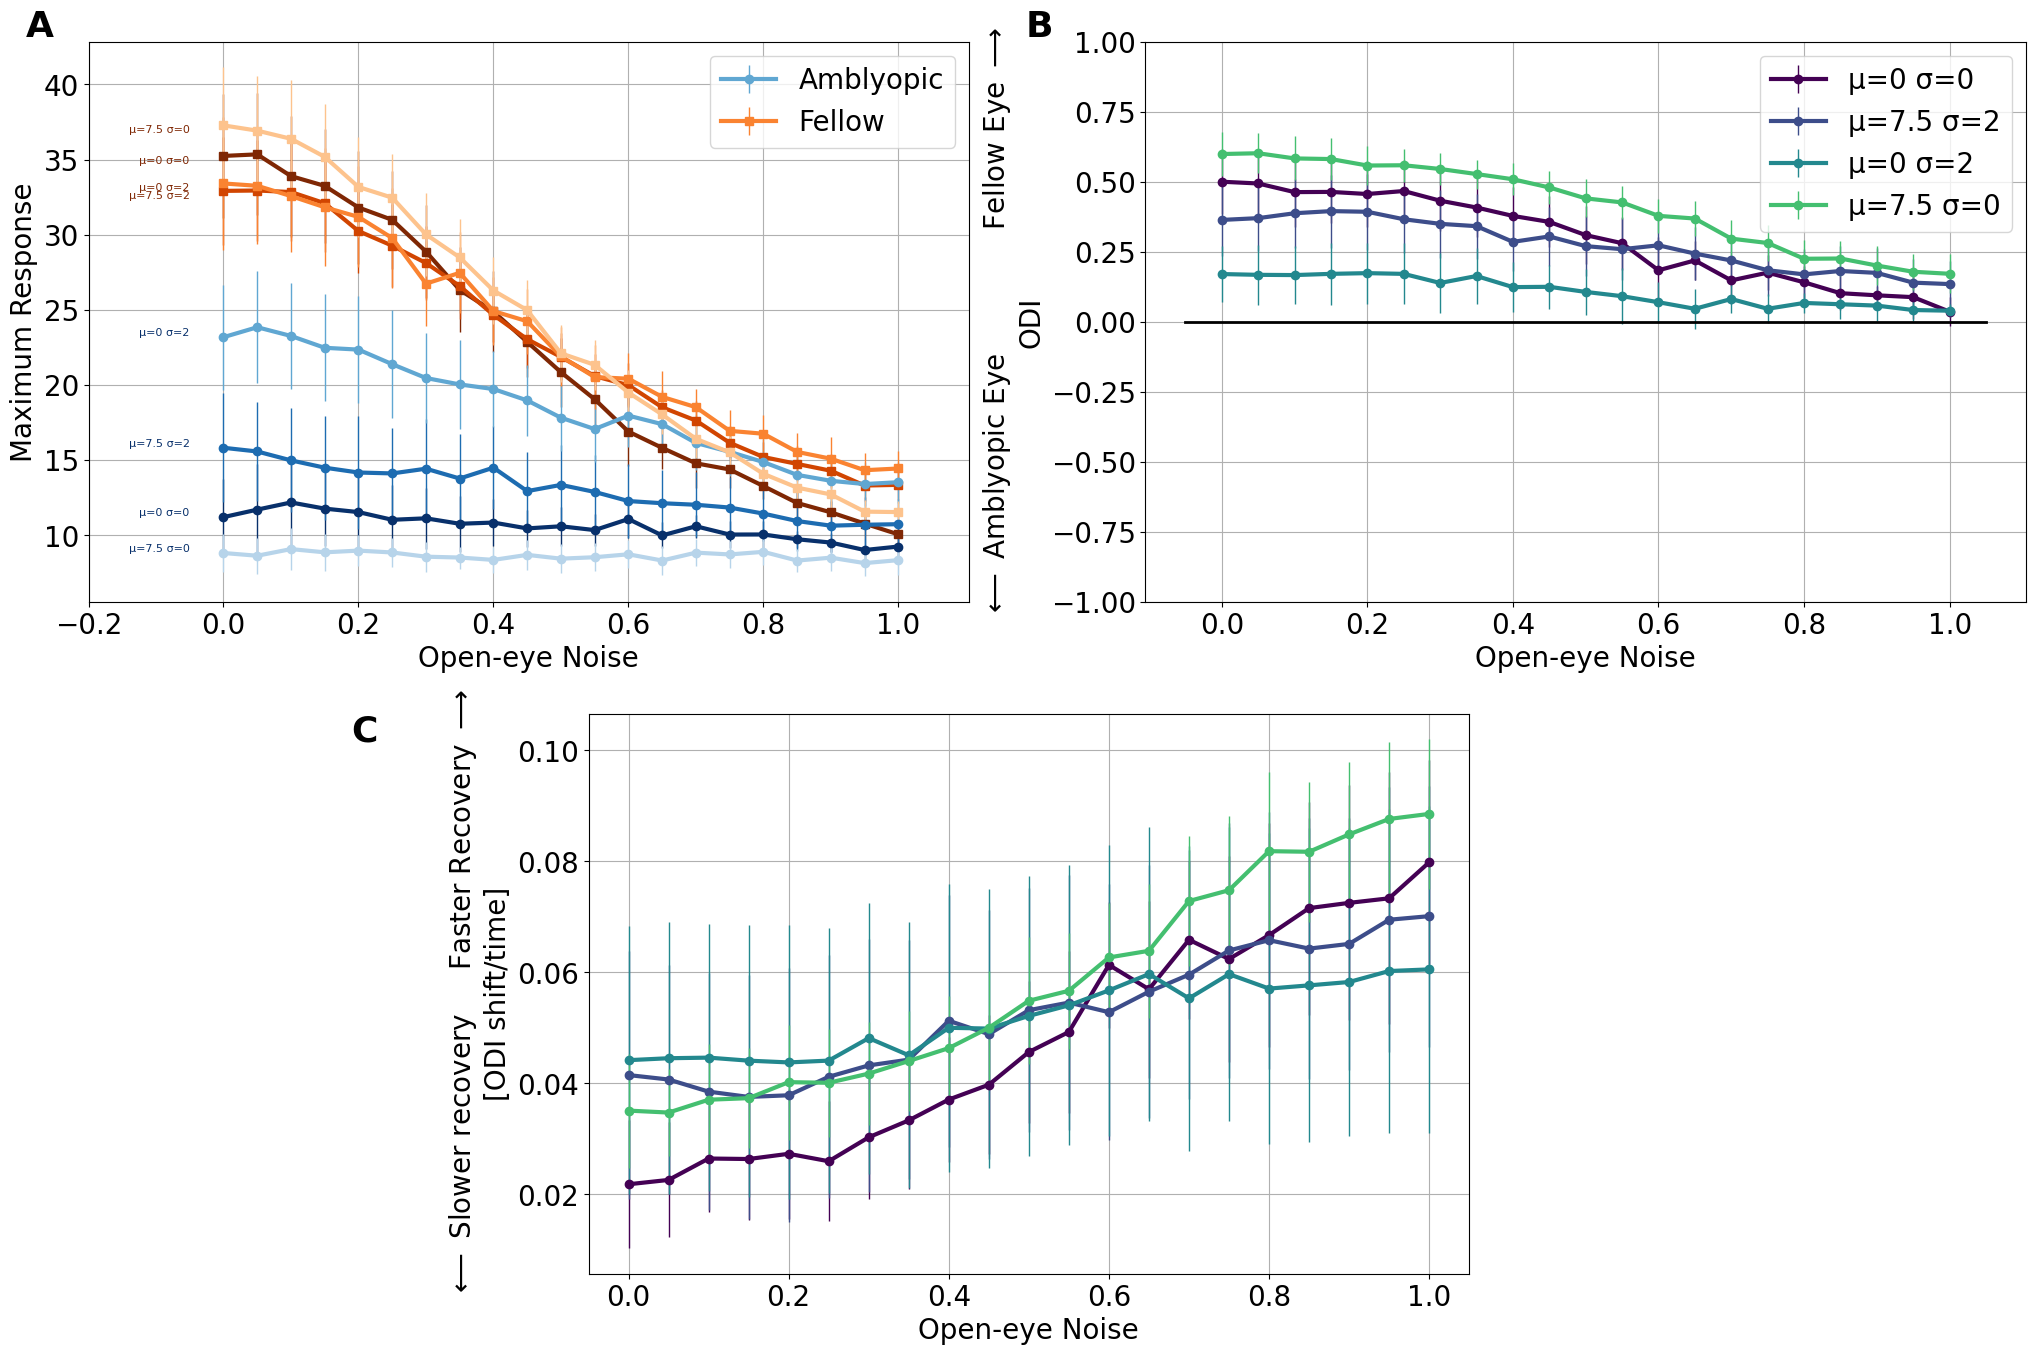

In [41]:
figure(figsize=(25,16))
subplot(2,2,1)


v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=noise,μ1,μ2,σ1,σ2


    noise,μ1,μ2,σ1,σ2=s.arrays()

    if idx==2:
        errorbar(noise,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
        errorbar(noise,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    else:
        errorbar(noise,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='_',color=cm.Blues(v[idx]))
        errorbar(noise,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='_',color=cm.Oranges(v[idx]))
        
        
    dy=0.3
    text(-.05,μ1[:1]+dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Blues(v[0]))         
    text(-.05,μ2[:1]-dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Oranges(v[0]))
    
    idx+=1        
    
xlabel('Open-eye Noise')
ylabel('Maximum Response')
legend()    
# gca().set_xticks(range(0,13,2))
xlim([-.2,1.105])

    
    
subplot(2,2,2)
    
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        μ,σ=μσ(R.ODI[-1])
        
        s+=noise,μ,σ


    noise,μ,σ=s.arrays()

    errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Open-eye Noise')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")

ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

legend()    
# gca().set_xticks(range(0,13,2))

      

ax=subplot(2,2,3)
pos=ax.get_position().bounds
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3]])


v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
    
        s+=noise,recovery_rate_μ,recovery_rate_σ


    noise,μ,σ=s.arrays()



    errorbar(noise,-μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Open-eye Noise')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")



    
    
    
plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')


plt.text(.23, 0.46, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-fix-response-ODI-blur.png')    
    

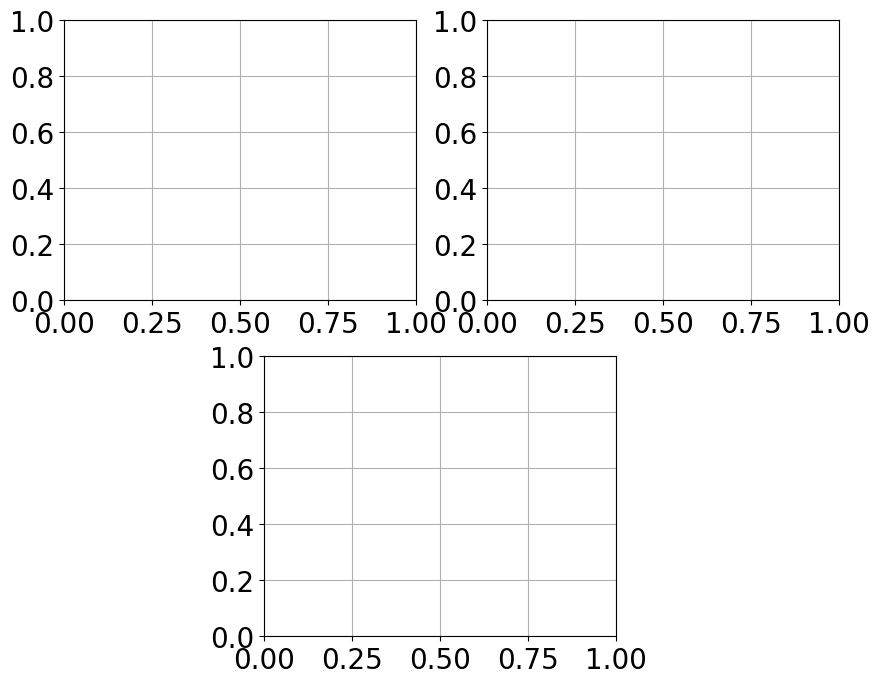

In [30]:
subplot(2,2,1)
subplot(2,2,2)

ax=subplot(2,2,3)
pos=ax.get_position().bounds
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3]])

In [28]:
pos=ax.get_position().extents
pos

array([0.125     , 0.11      , 0.47727273, 0.46      ])

In [24]:
pos.bounds

(0.125, 0.10999999999999999, 0.35227272727272724, 0.35000000000000003)

In [27]:
pos.extents

array([0.125     , 0.11      , 0.47727273, 0.46      ])

In [20]:
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3])

Signature: ax.set_position(pos, which='both')
Docstring:
Set the Axes position.

Axes have two position attributes. The 'original' position is the
position allocated for the Axes. The 'active' position is the
position the Axes is actually drawn at. These positions are usually
the same unless a fixed aspect is set to the Axes. See
`.Axes.set_aspect` for details.

Parameters
----------
pos : [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
    The new position of the in `.Figure` coordinates.

which : {'both', 'active', 'original'}, default: 'both'
    Determines which position variables to change.

See Also
--------
matplotlib.transforms.Bbox.from_bounds
matplotlib.transforms.Bbox.from_extents
File:      ~/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py
Type:      method


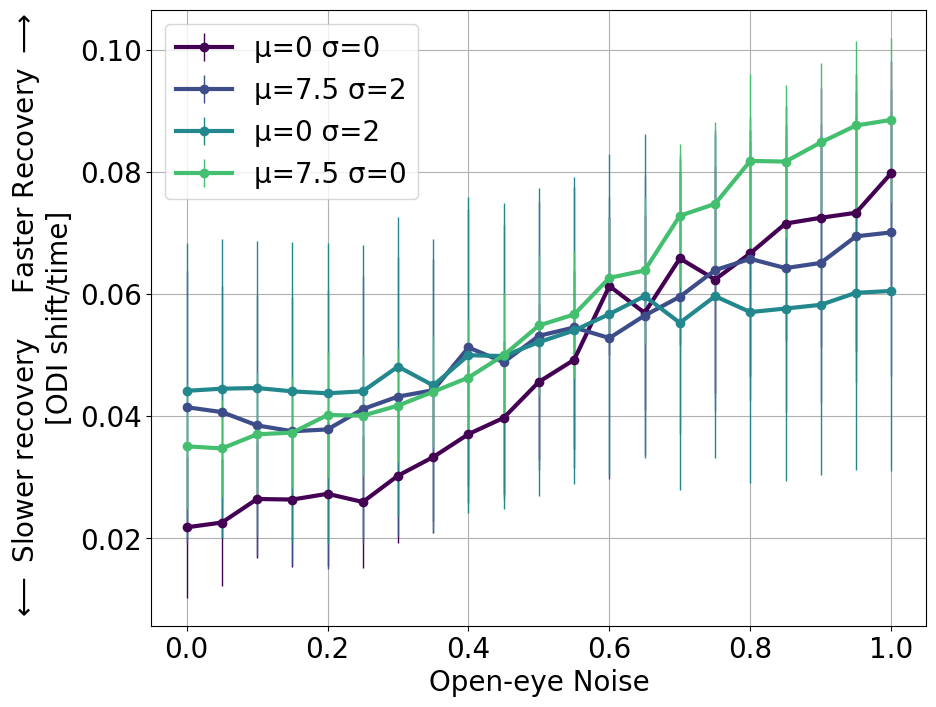

In [23]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for noise_count,noise in enumerate(noise_mat):
        open_eye_noise=noise
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        noise=params.noise
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
    
        s+=noise,recovery_rate_μ,recovery_rate_σ


    noise,μ,σ=s.arrays()



    errorbar(noise,-μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Open-eye Noise')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

# xl=xlim()
# plot(xl,[0,0],'k-',lw=2)

# yl=array(ylim())
# ylim([-abs(yl.max()),+abs(yl.max())])

legend()    
# gca().set_xticks(range(0,13,2))

    

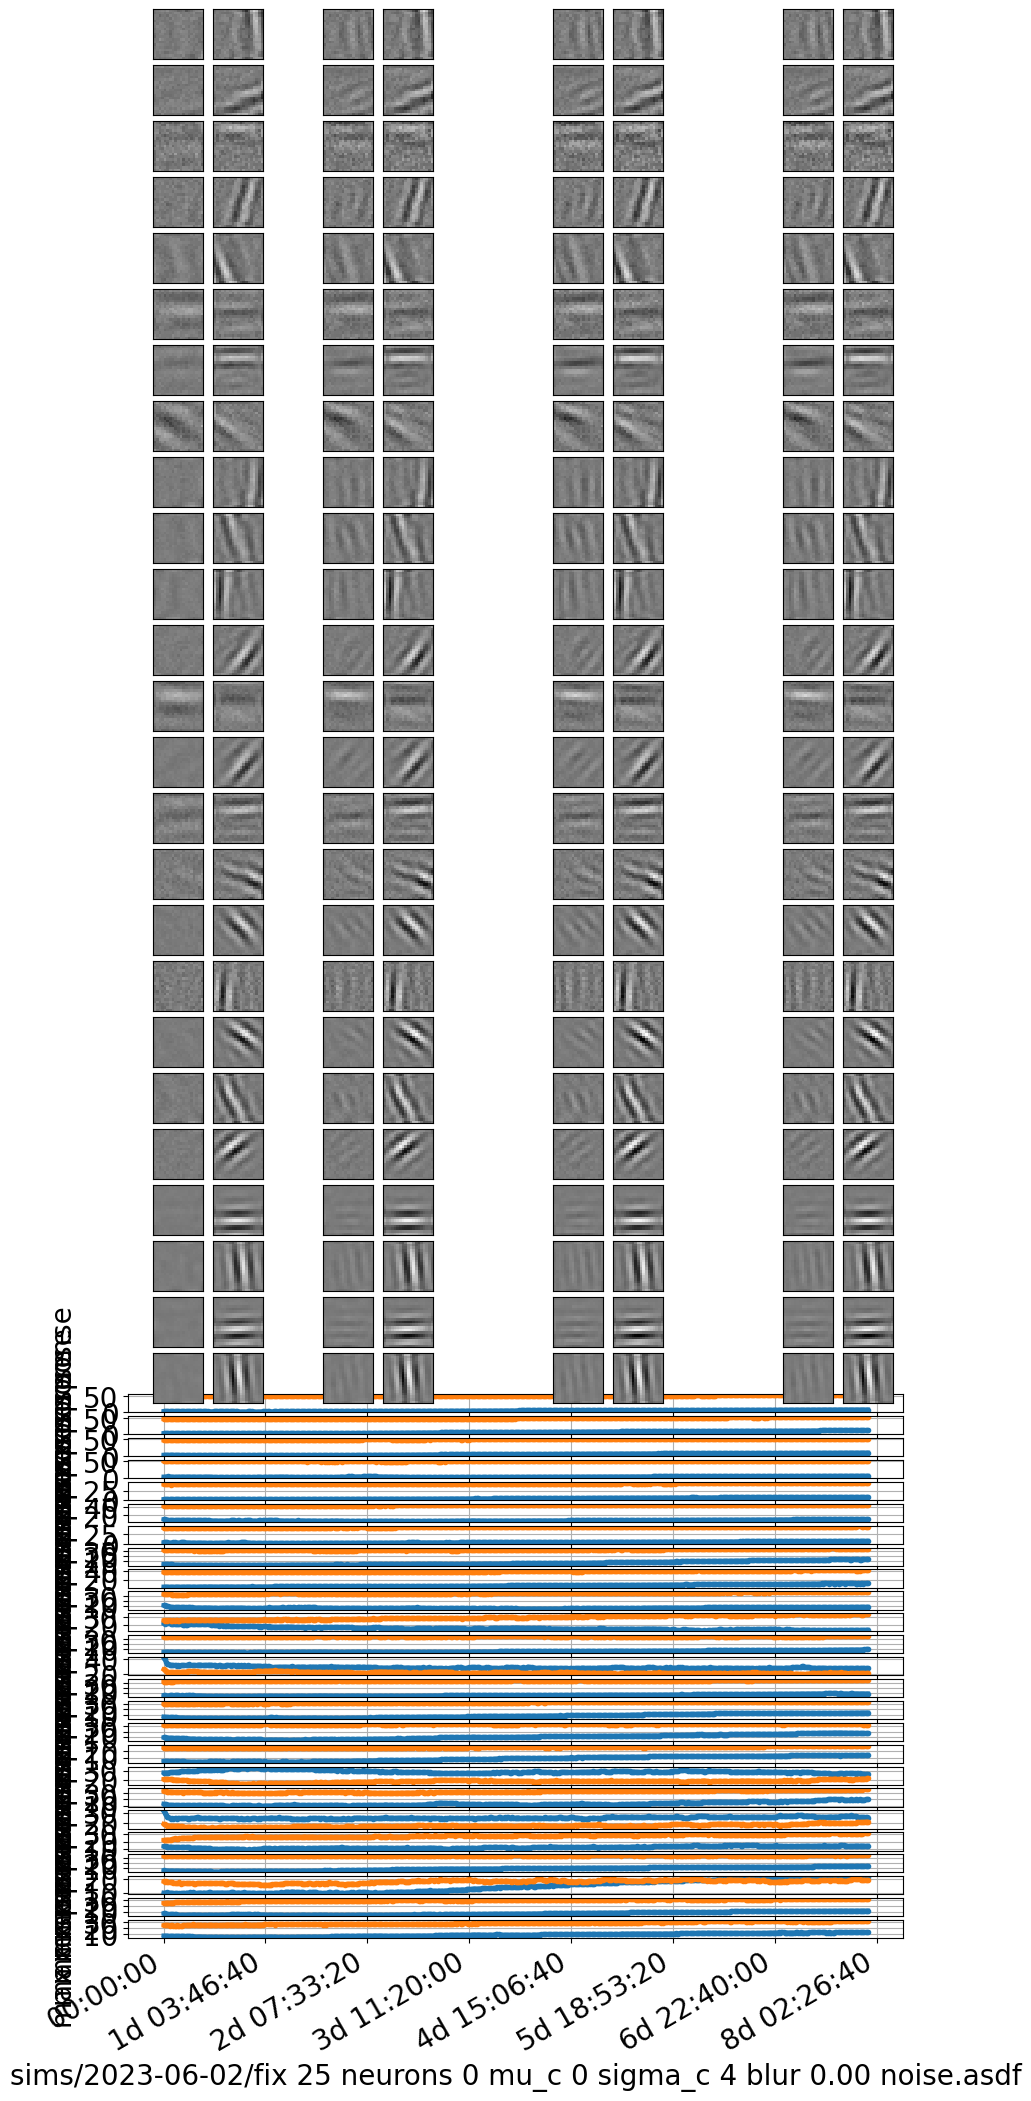

In [20]:
total_time=R.t.max()

figure()
plot_max_response(sfname)
xlabel(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )
